In [10]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import pickle

with open('/Users/huang/Desktop/TX/dataset/TencentGR_1k/seq_offsets.pkl', 'rb') as f:
    seq_offsets = pickle.load(f)
print(len(seq_offsets))
print("")
seq_offsets[:10]

865



[0, 18809, 38087, 50037, 66624, 85708, 102416, 120402, 137986, 156689]

In [12]:
import pickle
with open('/Users/huang/Desktop/TX/dataset/TencentGR_1k/indexer.pkl', 'rb') as ff:
    indexer = pickle.load(ff)
    itemnum = len(indexer['i'])
    usernum = len(indexer['u'])
indexer_i_rev = {v: k for k, v in indexer['i'].items()}
indexer_u_rev = {v: k for k, v in indexer['u'].items()}
indexer['u']

{'user_01060923': 1,
 'user_00300038': 2,
 'user_00122945': 3,
 'user_00311455': 4,
 'user_00427257': 5,
 'user_00302056': 6,
 'user_00768541': 7,
 'user_01021061': 8,
 'user_01070082': 9,
 'user_01143180': 10,
 'user_00108967': 11,
 'user_00425382': 12,
 'user_01052601': 13,
 'user_00158735': 14,
 'user_00681730': 15,
 'user_01014574': 16,
 'user_00696309': 17,
 'user_00287222': 18,
 'user_00864332': 19,
 'user_00475917': 20,
 'user_00496979': 21,
 'user_01300597': 22,
 'user_00994360': 23,
 'user_01097760': 24,
 'user_00663967': 25,
 'user_00808858': 26,
 'user_01084535': 27,
 'user_01176597': 28,
 'user_01186068': 29,
 'user_00736363': 30,
 'user_01228837': 31,
 'user_00790789': 32,
 'user_01086409': 33,
 'user_01080860': 34,
 'user_00867624': 35,
 'user_01026267': 36,
 'user_00073835': 37,
 'user_00846392': 38,
 'user_00395005': 39,
 'user_00441459': 40,
 'user_01237194': 41,
 'user_00897894': 42,
 'user_00051460': 43,
 'user_01260045': 44,
 'user_01121458': 45,
 'user_01081386': 4

In [13]:
# 读 /Users/huang/Desktop/TX/dataset/TencentGR_1k/item_feat_dict.json
item_feat_dict = {}
with open('/Users/huang/Desktop/TX/dataset/TencentGR_1k/item_feat_dict.json', 'r', encoding='utf-8') as file:
    item_feat_dict = json.load(file)
item_feat_dict['5678']

{'112': 14,
 '117': 254,
 '118': 358,
 '119': 370,
 '120': 781,
 '121': 7406,
 '100': 6,
 '101': 18,
 '102': 4581,
 '122': 1120,
 '111': 2971,
 '114': 16,
 '115': 44,
 '116': 13}

In [39]:
# 读 ‘/Users/huang/Desktop/TX/dataset/TencentGR_1k/seq.jsonl’
seqs = []
with open('/Users/huang/Desktop/TX/dataset/TencentGR_1k/seq.jsonl', 'r', encoding='utf-8') as file:
    for line in file:
        seqs.append(json.loads(line))
seqs[0]

[[640,
  47086,
  None,
  {'112': 14,
   '117': 80,
   '118': 249,
   '119': 1174,
   '120': 118,
   '100': 6,
   '101': 18,
   '102': 6779,
   '122': 8307,
   '114': 16,
   '116': 6,
   '121': 28737,
   '111': 42338},
  0,
  1745813860],
 [640,
  53920,
  None,
  {'112': 14,
   '117': 80,
   '118': 249,
   '119': 305,
   '120': 11,
   '100': 6,
   '101': 28,
   '102': 10123,
   '122': 5741,
   '114': 4,
   '116': 15,
   '121': 1485,
   '111': 30361},
  0,
  1745825229],
 [640,
  25129,
  None,
  {'112': 14,
   '117': 265,
   '118': 689,
   '119': 1431,
   '120': 695,
   '100': 6,
   '101': 28,
   '102': 5857,
   '122': 4940,
   '114': 4,
   '116': 15,
   '121': 26028,
   '111': 56968},
  0,
  1745825832],
 [640,
  42664,
  None,
  {'100': 6,
   '101': 18,
   '102': 6800,
   '122': 6391,
   '114': 16,
   '115': 17,
   '116': 13,
   '121': 34027,
   '111': 2279},
  0,
  1745911925],
 [640,
  20488,
  None,
  {'112': 14,
   '117': 80,
   '118': 160,
   '119': 327,
   '120': 931,
   '100'

# Action Label

In [15]:
group_acts = []
act_click = 0
act_unclick = 0
for _, seq in enumerate(seqs):
    click = 0
    unclick = 0
    for act in seq:
        if act[-2] == 1:
            click += 1
            act_click += 1
        elif act[-2] == 0:
            unclick += 1
            act_unclick += 1
    group_acts.append(click/unclick)
# 计算mean
print(np.mean(group_acts))
print(act_click/(act_unclick+act_click))

0.11703254510394379
0.10067506166428664


# Sparse Feature Analysis

In [ ]:
# feat_types['user_sparse'] = ['103', '104', '105', '109']
# feat_types['item_sparse'] = ['100','117','111','118','101','102','119','120','114','112','121','115','122','116',]
# feat_types['item_array'] = []
# feat_types['user_array'] = ['106', '107', '108', '110']

feat_types = {
    '103': 'user_sparse',
    '104': 'user_sparse',
    '105': 'user_sparse',
    '109': 'user_sparse',
    '100': 'item_sparse',
    '117': 'item_sparse',
    '111': 'item_sparse',
    '118': 'item_sparse',
    '101': 'item_sparse',
    '102': 'item_sparse',
    '119': 'item_sparse',
    '120': 'item_sparse',
    '114': 'item_sparse',
    '112': 'item_sparse',
    '121': 'item_sparse',
    '115': 'item_sparse',
    '122': 'item_sparse',
    '116': 'item_sparse',
    '106': 'user_array',
    '107': 'user_array',
    '108': 'user_array',
    '110': 'user_array',
}
user_feature_ids = ['103', '104', '105', '109', '106', '107', '108', '110']
item_feature_ids = ['100','117','111','118','101','102','119','120','114','112','121','115','122','116']

# (user_id, item_id, user_feat, item_feat, action_type, timestamp)

user_feature_dict = {feat_id:{} for feat_id in user_feature_ids}
item_feature_dict = {feat_id:{} for feat_id in item_feature_ids}

103 86
104 2
105 7
109 3
106 14
107 19
108 4
110 2
[(1, 13466), (2, 21081), (3, 42), (4, 23849), (5, 169), (6, 25800), (7, 1177), (8, 26776), (9, 14154), (10, 23611), (11, 495), (12, 6), (13, 58), (14, 296), (15, 27), (16, 2019), (17, 23237), (18, 6114), (19, 34), (20, 861), (21, 9332), (22, 29986), (23, 48), (24, 13176), (25, 31613), (26, 339), (27, 106), (28, 28333), (29, 7550), (30, 1261), (31, 228), (32, 16395), (33, 965), (34, 12346), (35, 11387), (36, 2401), (37, 2296), (38, 22639), (39, 44), (40, 16465), (41, 10283), (42, 56), (43, 4467), (44, 24120), (45, 5474), (46, 30598), (47, 5267), (48, 25724), (49, 3204), (50, 746), (51, 6815), (52, 7012), (53, 2394), (54, 1821), (55, 26969), (56, 84), (57, 27932), (58, 3834), (59, 29633), (60, 30444), (61, 25547), (62, 143), (63, 11051), (64, 3350), (65, 27064), (66, 27693), (67, 31076), (68, 23488), (69, 25723), (70, 586), (71, 26008), (72, 8189), (73, 1418), (74, 31203), (75, 862), (76, 13185), (77, 4500), (78, 2826), (79, 53), (80, 14

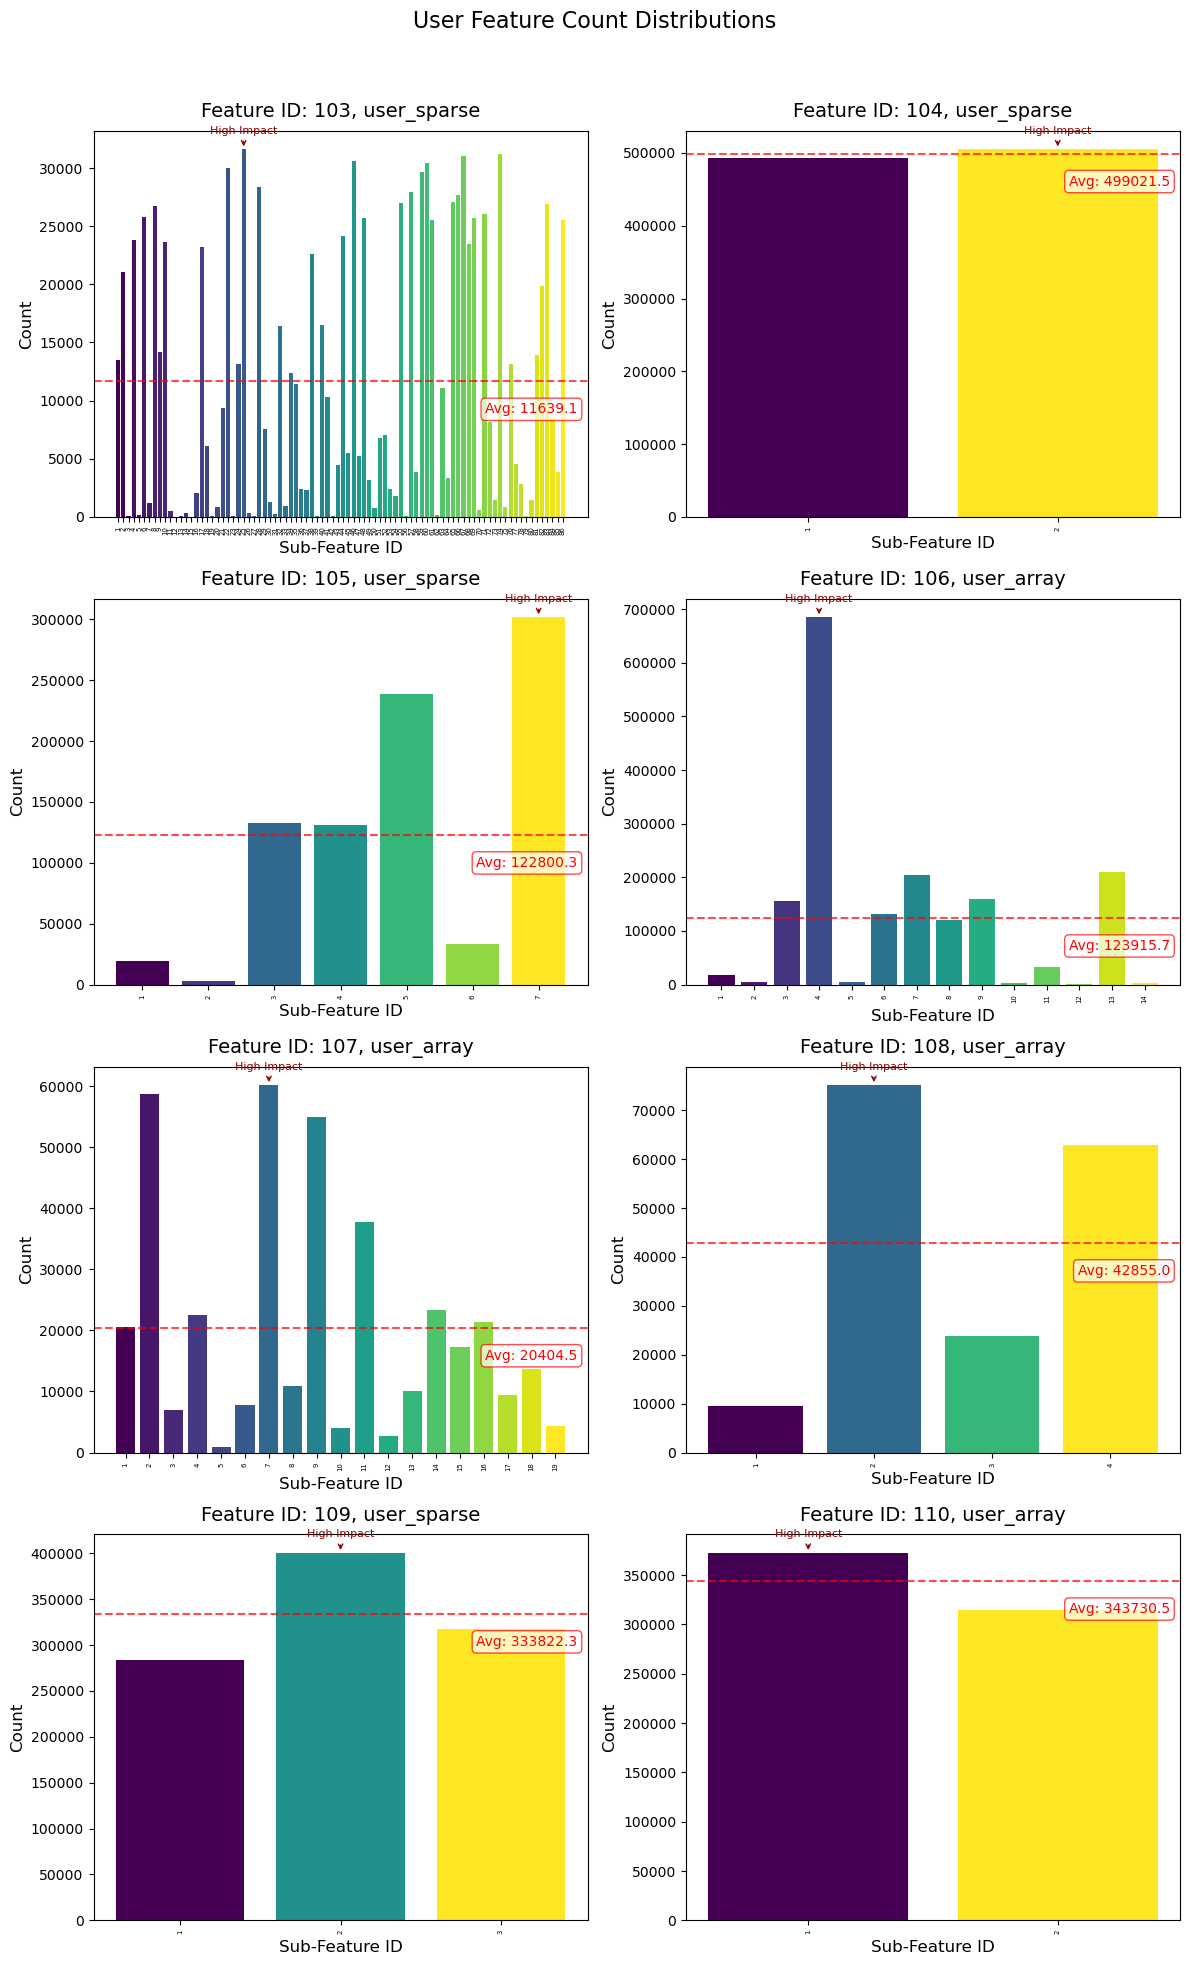

In [38]:
# user
for index, seq in enumerate(seqs):
    for sub_seq in seq:
        if sub_seq[2] is not None:
            feats = {feat_id: feat for feat_id, feat in sub_seq[2].items()}
            for feat_id, feat in feats.items():
                if feat_types[feat_id] == 'user_array':
                    for sub_feat in feat:
                        user_feature_dict[feat_id][sub_feat] = user_feature_dict[feat_id].get(sub_feat, 0) + 1
                if feat_types[feat_id] == 'user_sparse':
                    user_feature_dict[feat_id][feat] = user_feature_dict[feat_id].get(feat, 0) + 1

for key, value in user_feature_dict.items():
    print(key, len(value))

user_feature_dict = {'103': {60: 30444, 61: 25547, 4: 23849, 71: 26008, 67: 31076, 57: 27932, 59: 29633, 82: 19842, 25: 31613, 86: 25538, 41: 10283, 2: 21081, 28: 28333, 17: 23237, 44: 24120, 8: 26776, 68: 23488, 49: 3204, 46: 30598, 9: 14154, 55: 26969, 66: 27693, 81: 13888, 78: 2826, 77: 4500, 22: 29986, 38: 22639, 43: 4467, 6: 25800, 34: 12346, 83: 26944, 20: 861, 58: 3834, 65: 27064, 35: 11387, 48: 25724, 74: 31203, 40: 16465, 21: 9332, 69: 25723, 24: 13176, 84: 8459, 45: 5474, 1: 13466, 53: 2394, 63: 11051, 27: 106, 10: 23611, 52: 7012, 29: 7550, 51: 6815, 32: 16395, 76: 13185, 72: 8189, 47: 5267, 31: 228, 64: 3350, 18: 6114, 54: 1821, 70: 586, 37: 2296, 50: 746, 16: 2019, 80: 1450, 14: 296, 7: 1177, 75: 862, 33: 965, 36: 2401, 26: 339, 85: 3819, 5: 169, 73: 1418, 30: 1261, 3: 42, 42: 56, 79: 53, 62: 143, 11: 495, 19: 34, 56: 84, 39: 44, 23: 48, 15: 27, 13: 58, 12: 6}, '104': {2: 505087, 1: 492956}, '105': {5: 238361, 7: 301748, 3: 132472, 4: 131449, 6: 33427, 1: 19460, 2: 2685}, '109': {2: 400558, 1: 283716, 3: 317193}, '106': {4: 684920, 13: 210292, 9: 159371, 3: 156016, 7: 203615, 6: 131702, 8: 120768, 11: 32366, 1: 17704, 14: 3952, 10: 3246, 5: 4546, 2: 4283, 12: 2039}, '107': {8: 10840, 1: 20598, 7: 60200, 15: 17347, 2: 58733, 9: 54988, 4: 22548, 11: 37820, 16: 21371, 13: 10067, 3: 6922, 19: 4275, 17: 9404, 14: 23359, 18: 13699, 6: 7801, 12: 2744, 10: 4094, 5: 876}, '108': {2: 75191, 4: 62845, 3: 23907, 1: 9477}, '110': {1: 372563, 2: 314898}}
# 提取所有feature_id并排序
feature_ids = sorted(user_feature_dict.keys())
num_plots = len(feature_ids)
num_plots = (len(feature_ids) + 1) // 2

# 创建图形和子图，垂直排列
fig, axes = plt.subplots(num_plots, 2, figsize=(12, 5 * num_plots))
fig.suptitle('User Feature Count Distributions', fontsize=16)
plt.subplots_adjust(hspace=0.4)  # 增加子图间距

# 处理每个feature_id的数据
for i, feat_id in enumerate(feature_ids):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    feat_data = user_feature_dict[feat_id]
    
    if not feat_data:
        # 处理空数据
        ax.text(0.5, 0.5, 'No Data Available', 
                fontsize=12, ha='center', va='center')
        ax.set_title(f"Feature ID: {feat_id}", fontsize=8, pad=10)
        ax.set_xticks([])
        ax.set_yticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)
        continue
    
    # 提取子特征ID和数量
    sub_features = sorted(feat_data.items(), key=lambda x: x[0], reverse=False)
    print(sub_features)
    sub_ids, counts = zip(*sub_features)
    
    # 绘制条形图
    bars = ax.bar(range(len(sub_ids)), counts, color=plt.cm.viridis(np.linspace(0, 1, len(sub_ids))))
    
    # 设置标题和标签
    ax.set_title(f"Feature ID: {feat_id}, {feat_types[feat_id]}", fontsize=14, pad=10)
    ax.set_xlabel("Sub-Feature ID", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    
    # 添加数值标签（当数量不太多时）
    max_count = max(counts)
    if max_count < 300:  # 仅当最大数量适中时才添加标签
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9, 
                        rotation=90 if max_count < 50 else 0)
    
    # 设置x轴刻度
    ax.set_xticks(range(len(sub_ids)))
    ax.set_xticklabels([f"{sfid}" for sfid in sub_ids], rotation=90, fontsize=5)
    
    # 添加水平参考线（平均值）
    avg_count = np.mean(counts)
    ax.axhline(y=avg_count, color='r', linestyle='--', alpha=0.7)
    ax.annotate(f'Avg: {avg_count:.1f}', 
                xy=(0.98, avg_count), xycoords=('axes fraction', 'data'),
                xytext=(0, -15), textcoords='offset points',
                ha='right', va='top', color='r', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.7))
    
    # 为某些特别大的值添加特别标注
    if max_count > 1000:  # 如果最大值特别大
        max_index = counts.index(max_count)
        ax.annotate('High Impact', 
                    xy=(max_index, max_count),
                    xytext=(max_index, max_count * 1.05),
                    arrowprops=dict(arrowstyle="->", color='darkred'),
                    ha='center', va='center', color='darkred', fontsize=8)
total_plots = num_plots * 2
for j in range(len(feature_ids), total_plots):
    row, col = divmod(j, 2)
    axes[row, col].axis('off')
# 优化显示
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 为总标题留空间
plt.savefig('user_feature_distributions.png', dpi=150, bbox_inches='tight')
plt.show()
